In [1]:
from color_filter.preprocess_pdh import total_function
import os
import cv2

In [2]:
img_path = "/hdd/woonho/autonomous_driving/rfdata/0113/"

img_idx = 4300

img_list = os.listdir(img_path)

print(img_list[img_idx])
image = cv2.imread(os.path.join(img_path, img_list[img_idx]))
cv2.imwrite("image.png", image)
transform_img = total_function(image)

f_bird--a-2s30--1673613830.9153714--ed5ad27b-933f-11ed-bd3c-41fa17627ac1brightness.png


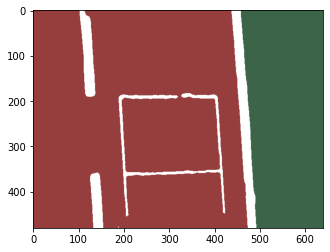

In [3]:
import matplotlib.pyplot as plt

plt.imshow(transform_img)
plt.show()

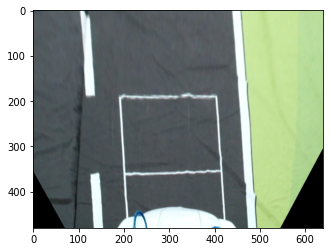

In [4]:
plt.imshow(image)
plt.show()

theta: 3.0717795
slope: theta: 3.0717795
slope: theta: 3.0717795
slope: theta: 3.0717795
slope: theta: 3.0892327
slope: theta: 3.054326
slope: theta: 3.0717795
slope: theta: 1.5707964
slope: theta: 3.0892327
slope: theta: 3.0892327
slope: theta: 3.054326
slope: theta: 1.5358897
slope: theta: 1.553343
slope: theta: 1.5358897
slope: theta: 3.0892327
slope: theta: 1.5184364
slope: theta: 3.0717795
slope: theta: 1.553343
slope: theta: 3.054326
slope: theta: 3.0892327
slope: theta: 3.0892327
slope: theta: 1.6057029
slope: theta: 3.0892327
slope: theta: 1.4835298
slope: theta: 3.0892327
slope: theta: 1.553343
slope: theta: 3.054326
slope: theta: 3.0892327
slope: theta: 1.5707964
slope: theta: 3.054326
slope: theta: 1.5707964
slope: theta: 1.6231562
slope: theta: 3.0892327
slope: theta: 3.0892327
slope: theta: 3.106686
slope: theta: 1.5009831
slope: theta: 3.0717795
slope: theta: 3.0717795
slope: theta: 3.106686
slope: theta: 1.5882496
slope: theta: 3.0368729
slope: theta: 1.553343
slope: the

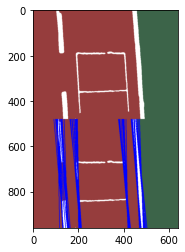

In [5]:
from utility import dominant_gradient

res = dominant_gradient(transform_img)

plt.imshow(res)
plt.show()